# Restaurant Reviews Dataset - Exploratory Data Analysis

This notebook performs comprehensive EDA on the Google Maps restaurant reviews dataset to understand:
- Dataset structure and quality
- Review patterns and distributions
- Text characteristics
- Rating patterns
- Image availability
- Potential data quality issues for the BitDance pipeline


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings

warnings.filterwarnings("ignore")

# Set style
plt.style.use("default")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (12, 8)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_csv("./data/reviews.csv")

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Dataset loaded successfully!
Shape: (1100, 6)
Columns: ['business_name', 'author_name', 'text', 'photo', 'rating', 'rating_category']


In [3]:
%ls data

reviews.csv


## 1. Dataset Overview


In [4]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Total records: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n=== COLUMN INFO ===")
df.info()

print("\n=== SAMPLE DATA ===")
display(df.head())

print("\n=== BASIC STATISTICS ===")
display(df.describe())

=== DATASET OVERVIEW ===
Total records: 1,100
Total columns: 6
Memory usage: 0.52 MB

=== COLUMN INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   business_name    1100 non-null   object
 1   author_name      1100 non-null   object
 2   text             1100 non-null   object
 3   photo            1100 non-null   object
 4   rating           1100 non-null   int64 
 5   rating_category  1100 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.7+ KB

=== SAMPLE DATA ===


,business_name,author_name,text,photo,rating,rating_category
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday...,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to f...,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the ph...,dataset/outdoor_atmosphere/hacinin_yeri_yasin_...,3,outdoor_atmosphere
3,Haci'nin Yeri - Yigit Lokantasi,Orhan Kapu,Turkey's cheapest artisan restaurant and its f...,dataset/indoor_atmosphere/hacinin_yeri_orhan_k...,5,indoor_atmosphere
4,Haci'nin Yeri - Yigit Lokantasi,Ozgur Sati,I don't know what you will look for in terms o...,dataset/menu/hacinin_yeri_ozgur_sati.png,3,menu



=== BASIC STATISTICS ===


,rating
count,1100.000000
mean,3.912727
std,1.218459
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [5]:
# Missing values analysis
print("=== MISSING VALUES ===")
missing_stats = pd.DataFrame(
    {
        "Missing Count": df.isnull().sum(),
        "Missing Percentage": (df.isnull().sum() / len(df)) * 100,
    }
)
missing_stats = missing_stats[missing_stats["Missing Count"] > 0].sort_values(
    "Missing Percentage", ascending=False
)
print(missing_stats)

# Visualize missing values
if len(missing_stats) > 0:
    plt.figure(figsize=(10, 6))
    missing_stats["Missing Percentage"].plot(kind="bar")
    plt.title("Missing Values by Column")
    plt.ylabel("Missing Percentage (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found!")

=== MISSING VALUES ===
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []
No missing values found!


## 2. Rating Analysis


=== RATING ANALYSIS ===
Rating distribution:
rating
1     80
2     72
3    172
4    316
5    460
Name: count, dtype: int64

Average rating: 3.91
Median rating: 4.00
Standard deviation: 1.22


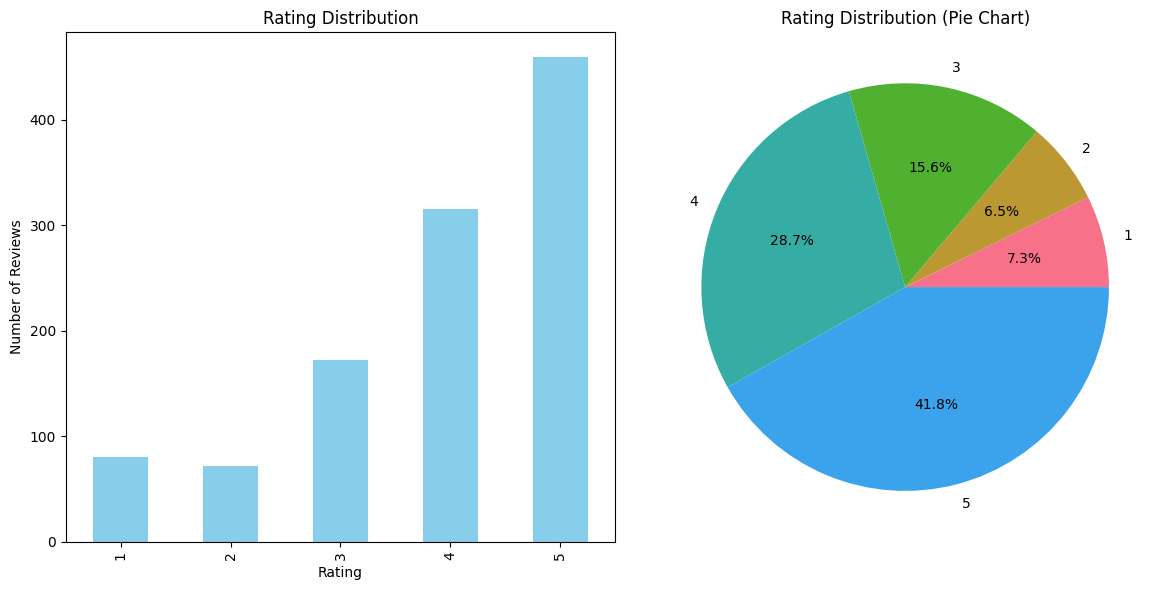

In [6]:
# Rating distribution
print("=== RATING ANALYSIS ===")
rating_counts = df["rating"].value_counts().sort_index()
print("Rating distribution:")
print(rating_counts)
print(f"\nAverage rating: {df['rating'].mean():.2f}")
print(f"Median rating: {df['rating'].median():.2f}")
print(f"Standard deviation: {df['rating'].std():.2f}")

# Visualize rating distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
rating_counts.plot(kind="bar", color="skyblue")
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")

plt.subplot(1, 2, 2)
plt.pie(rating_counts.values, labels=rating_counts.index, autopct="%1.1f%%")
plt.title("Rating Distribution (Pie Chart)")

plt.tight_layout()
plt.show()

## 3. Text Analysis


=== TEXT ANALYSIS ===
Average text length: 110.84 characters
Median text length: 104.00 characters
Average word count: 20.05 words
Median word count: 19.00 words


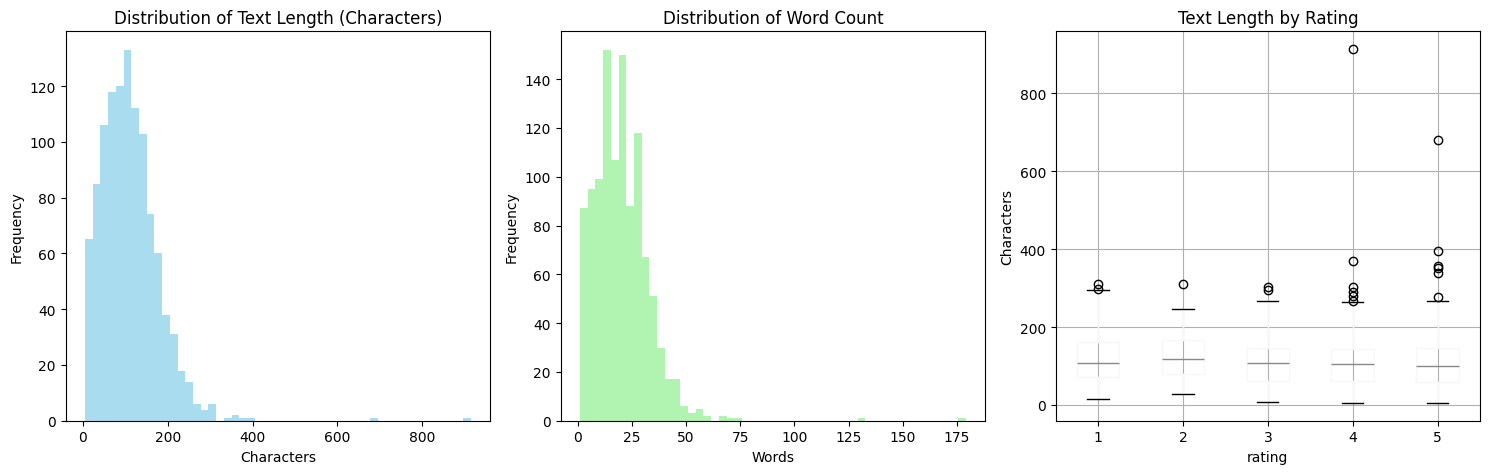

In [7]:
# Text length analysis
print("=== TEXT ANALYSIS ===")
df["text_length"] = df["text"].str.len()
df["word_count"] = df["text"].str.split().str.len()

print(f"Average text length: {df['text_length'].mean():.2f} characters")
print(f"Median text length: {df['text_length'].median():.2f} characters")
print(f"Average word count: {df['word_count'].mean():.2f} words")
print(f"Median word count: {df['word_count'].median():.2f} words")

# Text length distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df["text_length"], bins=50, alpha=0.7, color="skyblue")
plt.title("Distribution of Text Length (Characters)")
plt.xlabel("Characters")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(df["word_count"], bins=50, alpha=0.7, color="lightgreen")
plt.title("Distribution of Word Count")
plt.xlabel("Words")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
df.boxplot(column="text_length", by="rating", ax=plt.gca())
plt.title("Text Length by Rating")
plt.suptitle("")
plt.ylabel("Characters")

plt.tight_layout()
plt.show()

## 4. Data Quality Assessment for BitDance Pipeline


In [8]:
print("=== DATA QUALITY ASSESSMENT FOR BITDANCE PIPELINE ===")

# Required columns check
required_cols = ["business_name", "author_name", "text", "rating"]
missing_required = [col for col in required_cols if col not in df.columns]

print("\n1. SCHEMA COMPATIBILITY:")
if missing_required:
    print(f"❌ Missing required columns: {missing_required}")
else:
    print("✅ All required columns present")

print(
    f"✅ Optional 'photo' column: {'Present' if 'photo' in df.columns else 'Missing'}"
)
print(
    f"✅ Bonus 'rating_category' column: {'Present' if 'rating_category' in df.columns else 'Missing'}"
)

print("\n2. DATA QUALITY ISSUES:")
issues = []

# Check for missing values in required columns
for col in required_cols:
    if col in df.columns:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            issues.append(
                f"Missing values in {col}: {missing_count} ({missing_count / len(df) * 100:.1f}%)"
            )

# Check for very short text
short_text_count = (df["text"].str.len() <= 10).sum()
if short_text_count > 0:
    issues.append(
        f"Very short reviews (≤10 chars): {short_text_count} ({short_text_count / len(df) * 100:.1f}%)"
    )

# Check rating range
invalid_ratings = df[(df["rating"] < 1) | (df["rating"] > 5)]
if len(invalid_ratings) > 0:
    issues.append(f"Invalid ratings (not 1-5): {len(invalid_ratings)}")

# Check for duplicates
duplicates = df.duplicated(["business_name", "author_name", "text"]).sum()
if duplicates > 0:
    issues.append(
        f"Potential duplicate reviews: {duplicates} ({duplicates / len(df) * 100:.1f}%)"
    )

if issues:
    for issue in issues:
        print(f"⚠️  {issue}")
else:
    print("✅ No major data quality issues found")

print("\n3. DATASET STATISTICS:")
print(f"📊 Total reviews: {len(df):,}")
print(f"📊 Unique businesses: {df['business_name'].nunique():,}")
print(f"📊 Unique reviewers: {df['author_name'].nunique():,}")
print(f"📊 Average review length: {df['text'].str.len().mean():.0f} characters")
print(f"📊 Average rating: {df['rating'].mean():.2f}/5.0")

# Image statistics
has_photo = df["photo"].notna() & (df["photo"] != "")
photo_percentage = has_photo.sum() / len(df) * 100
print(f"📊 Reviews with images: {photo_percentage:.1f}%")

print("\n4. RECOMMENDATIONS:")
print("✅ Dataset is compatible with BitDance pipeline")
print("✅ Current location: data/reviews.csv")
print("✅ Required: Move to data/archive/reviews.csv for pipeline")
print("✅ Update configs/base.yaml path if needed")
if duplicates > 0:
    print("⚠️  Consider deduplication during ingestion")
if short_text_count > 0:
    print("⚠️  Consider filtering very short reviews")
print("✅ Ready to run the ingestion task!")

=== DATA QUALITY ASSESSMENT FOR BITDANCE PIPELINE ===

1. SCHEMA COMPATIBILITY:
✅ All required columns present
✅ Optional 'photo' column: Present
✅ Bonus 'rating_category' column: Present

2. DATA QUALITY ISSUES:
⚠️  Very short reviews (≤10 chars): 23 (2.1%)

3. DATASET STATISTICS:
📊 Total reviews: 1,100
📊 Unique businesses: 100
📊 Unique reviewers: 1,074
📊 Average review length: 111 characters
📊 Average rating: 3.91/5.0
📊 Reviews with images: 100.0%

4. RECOMMENDATIONS:
✅ Dataset is compatible with BitDance pipeline
✅ Current location: data/reviews.csv
✅ Required: Move to data/archive/reviews.csv for pipeline
✅ Update configs/base.yaml path if needed
⚠️  Consider filtering very short reviews
✅ Ready to run the ingestion task!
